In [28]:
import pandas as pd
import seaborn as sns
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
colorless = diamonds[diamonds["color"].isin(["E","F","H","D","I"])]
colorless = colorless[["color","price"]].reset_index(drop=True)
colorless

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336
...,...,...
39835,D,2757
39836,D,2757
39837,D,2757
39838,H,2757


In [5]:
colorless.color = colorless.color.cat.remove_categories(["G","J"])
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [6]:
# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])
colorless

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111
...,...,...,...
39835,D,2757,7.921898
39836,D,2757,7.921898
39837,D,2757,7.921898
39838,H,2757,7.921898


In [7]:
colorless.dropna(inplace=True)
colorless.reset_index(inplace=True, drop=True)
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [8]:
colorless.to_csv('Data/diamonds.csv',index=False,header=list(colorless.columns))

## One-way ANOVA

In [9]:
diamonds = pd.read_csv("Data/diamonds.csv")
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


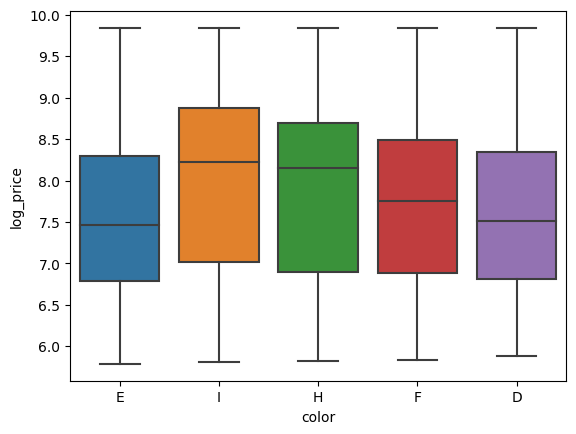

In [11]:
ax = sns.boxplot(x = "color", y = "log_price", data = diamonds)
ax = ax

### linear regression

In [12]:
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.61e-225
Time:                        20:23:11   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the color grades' associated beta coefficients all have a p- value of less than 0.05 (check the P>|t| column). But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

First, we have to state our null and alternative hypotheses:

Null Hypothesis

There is no difference in the price of diamonds based on color grade.

ANOVA tests with Python by Ayobola Lawal.ipynb 5/17
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()
# Get summary statistics
model.summary()

---

Alternative Hypothesis

### one-way ANOVA

In [13]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


Since the p-value (column PR(>F) ) is very small, we can reject the null hypothesis that the mean of the price is the same for all diamond color grades.

In [14]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
diamonds2 = diamonds[["color","cut","price"]]
diamonds2 = diamonds2[diamonds2["color"].isin(["E","F","H","D","I"])]
diamonds2.color = diamonds2.color.cat.remove_categories(["G","J"])
diamonds2 = diamonds2[diamonds2["cut"].isin(["Ideal","Premium","Very Good"])]
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good","Fair"])
diamonds2.dropna(inplace = True)
diamonds2.reset_index(inplace = True, drop = True)
diamonds2.insert(3,"log_price",[math.log(price) for price in diamonds2["price"]])
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [16]:
diamonds2.to_csv('Data/diamonds2.csv',index=False,header=list(diamonds2.columns))

### Two-Way ANOVA

In [18]:
diamonds2 = pd.read_csv("Data/diamonds2.csv")
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [21]:
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:06:23   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, many of the color grades' and cuts' associated beta coefficients have a p-value of less than 0.05 (check the P>|t| column). Additionally, some of the interactions also seem statistically signifcant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.
First, we have to state our three pairs of null and alternative hypotheses:

Null Hypothesis (Color)
There is no difference in the price of diamonds based on color.

---

Alternative Hypothesis (Color)
There is a difference in the price of diamonds based on color.

---

Null Hypothesis (Cut)
There is no difference in the price of diamonds based on cut.

---

Alternative Hypothesis (Cut)
There is a difference in the price of diamonds based on cut.

---

Null Hypothesis (Interaction)
Alternative Hypothesis (Interaction)


### two-way ANOVA

In [22]:
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


Since all of the p-values (column PR(>F) ) are very small, we can reject all three null hypotheses.

Recall the following definitions:
  - One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
  - Post hoc test: Performs a pairwise comparison between all available groups while controlling for the error rate.
> Note: Recall that if we run multiple hypothesis tests all with a 95% confidence level, there is an increasing chance of a false positive, or falsely rejecting the null hypothesis. The post hoc test will control for this, and allows us to run many hypothesis tests while remaining confident with the accuracy of the results. Otherwise, be very careful when running multiple hypothesis tests.

### Relevant Imports

In [24]:
diamonds = pd.read_csv("Data/diamonds.csv")

## One-way ANOVA

### linear regression

In [26]:
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.61e-225
Time:                        21:13:51   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


### Post hoc test

There are many post hoc tests that can be run. One of the most common ANOVA post hoc tests is the Tukey's HSD (honestly significantly different) test.

In [32]:
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


Each row represents a pariwise comparison between the prices of two diamond color grades. The reject column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds. We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.

Test 1: D vs. E
The price of D and E color grade diamonds are the same.
The price of D and E color grade diamonds are not the same.
Result: We cannot reject the null hypothesis that the price of D and E color grade diamonds are the same.
Test 2: D vs. F
The price of D and F color grade diamonds are the same.
The price of D and F color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of D and F color grade diamonds are the same.
Test 3: D vs. H
The price of D and H color grade diamonds are the same.
The price of D and H color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of D and H color grade diamonds are the same.
Test 4: D vs. I
The price of D and I color grade diamonds are the same.
The price of D and I color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of D and I color grade diamonds are the same.
Test 5: E vs. F
The price of E and F color grade diamonds are the same.
The price of E and F color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of E and F color grade diamonds are the same.
Test 6: E vs. H
The price of E and H color grade diamonds are the same.
The price of E and H color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of E and H color grade diamonds are the same.
Test 7: E vs. I
The price of E and I color grade diamonds are the same.
The price of E and I color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of E and I color grade diamonds are the same.
Test 8: F vs. H
The price of F and H color grade diamonds are the same.
The price of F and H color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of F and H color grade diamonds are the same.
Test 9: F vs. I
The price of F and I color grade diamonds are the same.
The price of F and I color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of F and I color grade diamonds are the same
Test 10: H vs. I
The price of H and I color grade diamonds are the same.
The price of H and I color grade diamonds are not the same.
Result: We can reject the null hypothesis that the price of H and I color grade diamonds are the same.